In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from statsmodels.tsa.statespace.sarimax import SARIMAX



In [6]:

# -----------------------------
# Load and preprocess data
# -----------------------------

df = pd.read_csv("./ML471_S4_Datafile_Practice.csv")


df["Date"] = pd.to_datetime(df["Date"])
df.set_index("Date", inplace=True)

# Monthly frequency
df = df.asfreq("ME")

# Target variable
y = df["Close"]


In [7]:

# -----------------------------
# Train-Test Split (80-20)
# -----------------------------
train_size = int(len(y) * 0.8)
train, test = y.iloc[:train_size], y.iloc[train_size:]

# -----------------------------
# SARIMA Model
# (1,0,1) x (3,1,1,12)
# -----------------------------
model = SARIMAX(
    train,
    order=(1, 0, 1),
    seasonal_order=(3, 1, 1, 12),
    enforce_stationarity=False,
    enforce_invertibility=False
)

results = model.fit()

# -----------------------------
# Forecast
# -----------------------------
forecast = results.forecast(steps=len(test))


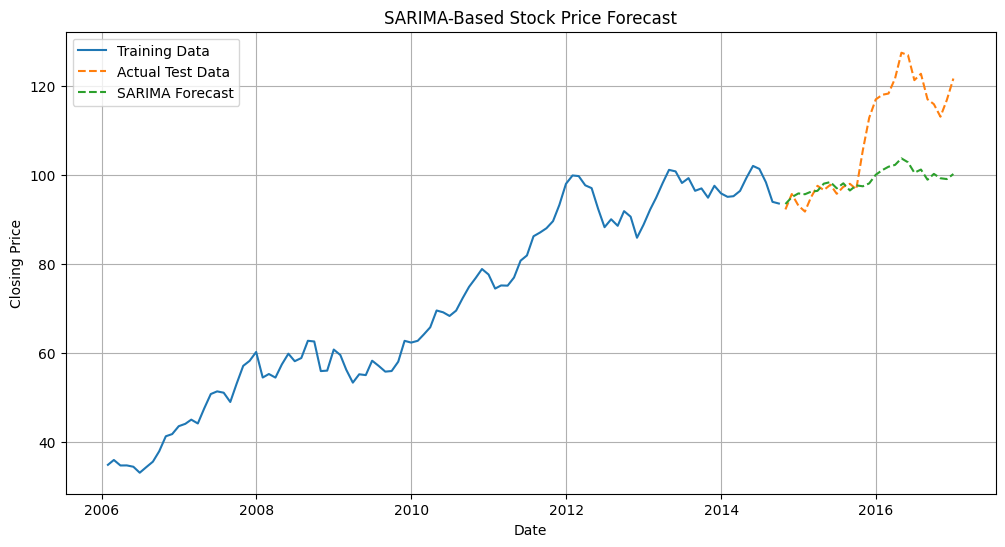

In [8]:

# -----------------------------
# Plot results
# -----------------------------
plt.figure(figsize=(12, 6))

plt.plot(train.index, train, label="Training Data")
plt.plot(test.index, test, linestyle="--", label="Actual Test Data")
plt.plot(test.index, forecast, linestyle="--", label="SARIMA Forecast")

plt.title("SARIMA-Based Stock Price Forecast")
plt.xlabel("Date")
plt.ylabel("Closing Price")
plt.legend()
plt.grid(True)
plt.show()